# About Dataset
## Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

## Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [2]:
# load all necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
# load dataset
df = pd.read_csv('../../dataset/Mall_Customers_Clustering.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
# checking for missing value
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


## Choosing the Annual Income and Spending Score Column

In [18]:
X = df.iloc[:,[3, 4]].values
print(X[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [49]:
# Calculate WCSS for different cluster
wcss = []

cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # append wcss value in a list
    wcss.append(kmeans.inertia_)


In [50]:
wcss

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

In [51]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

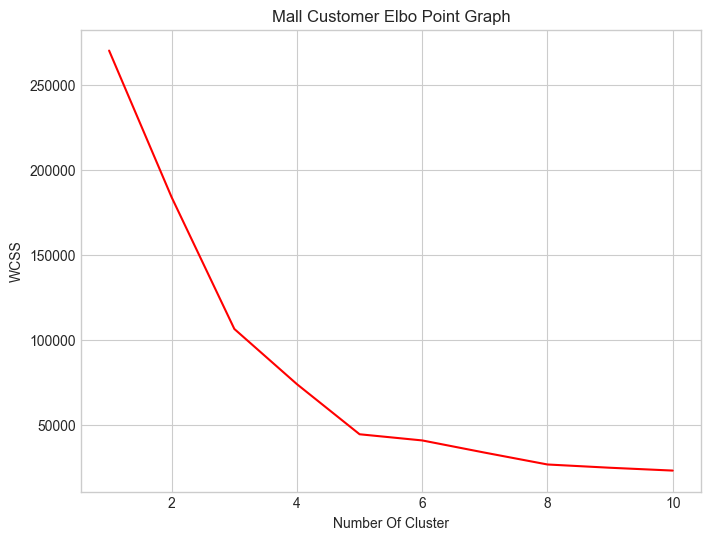

In [54]:
plt.style.use('seaborn-v0_8-whitegrid')
# visualize the elbo graph
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(range(1, 11), wcss, color='r');

# customize plot
ax.set(title="Mall Customer Elbo Point Graph",
      xlabel="Number Of Cluster",
      ylabel="WCSS");


## Knee locator

In [53]:
!pip install kneed

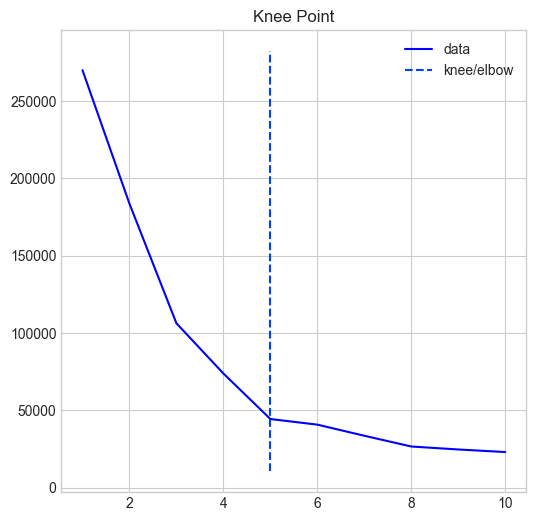

In [60]:
from kneed import KneeLocator
kneedle =  KneeLocator(cluster_range, wcss, curve="convex", direction="decreasing")
kneedle.plot_knee()

In [63]:
# check the optimal cluster number
cluster_number = kneedle.knee
cluster_number

5

After optimizing we can see that our optimal cluster is 5. Now it's time to training kmeans algo


In [64]:
kmeans = KMeans(n_clusters=cluster_number, init="k-means++", random_state=42)
y = kmeans.fit_predict(X)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

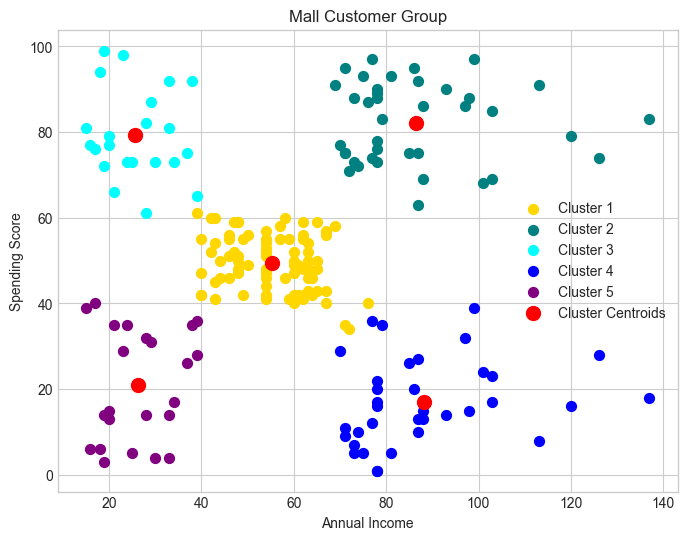

In [86]:
# Visualizing all clusters and their centroids
plt.subplots(figsize=(8, 6))

colors = ['gold', 'teal', 'cyan', 'blue', 'purple']

for i in range(0, 5):
    cluster_count = i + 1
    plt.scatter(X[y==i, 0], X[y==i, 1], s=50, c=colors[i], label=f"Cluster {cluster_count}")

# plt.scatter(X[y==0, 0], X[y==0, 1], s=50, c="green", label="Cluster 1")
# plt.scatter(X[y==1, 0], X[y==1, 1], s=50, c="teal", label="Cluster 2")
# plt.scatter(X[y==2, 0], X[y==2, 1], s=50, c="cyan", label="Cluster 3")
# plt.scatter(X[y==3, 0], X[y==3, 1], s=50, c="blue", label="Cluster 4")
# plt.scatter(X[y==4, 0], X[y==4, 1], s=50, c="yellow", label="Cluster 5")

# plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red", label="Cluster Centroids")
plt.title("Mall Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show();